In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading data
data=pd.read_csv('investment.csv')

In [3]:
#checking rows and column
data.shape

(225347, 18)

In [6]:
#checking columns
data.columns

Index(['Investor_ID', 'Age', 'Annual_Income', 'Investment_Amount',
       'Risk_Tolerance_Score', 'Months_of_Investing_Experience',
       'Number_of_Active_Investments', 'Potential_Return_Rate',
       'Investment_Duration', 'Investment_to_Income_Ratio', 'Education',
       'Employment_Status', 'Marital_Status', 'Owns_Property',
       'Has_Dependents', 'Investment_Sector', 'Has_Investment_Advisor',
       'Investment_Failed'],
      dtype='object')

In [7]:
#checking null values
data.isna().sum()

Investor_ID                           0
Age                               32840
Annual_Income                     22626
Investment_Amount                 18033
Risk_Tolerance_Score                  0
Months_of_Investing_Experience        0
Number_of_Active_Investments       4512
Potential_Return_Rate             11244
Investment_Duration                   0
Investment_to_Income_Ratio            0
Education                             0
Employment_Status                     0
Marital_Status                    42906
Owns_Property                         0
Has_Dependents                        0
Investment_Sector                     0
Has_Investment_Advisor             3849
Investment_Failed                     0
dtype: int64

In [8]:
#imputing null values with mean
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Annual_Income']=data['Annual_Income'].fillna(data['Annual_Income'].mean())
data['Investment_Amount']=data['Investment_Amount'].fillna(data['Investment_Amount'].mean())
data['Number_of_Active_Investments']=data['Number_of_Active_Investments'].fillna(data['Number_of_Active_Investments'].mean())
data['Potential_Return_Rate']=data['Potential_Return_Rate'].fillna(data['Potential_Return_Rate'].mean())
data['Has_Investment_Advisor']=data['Has_Investment_Advisor'].fillna(data['Has_Investment_Advisor'].mean())

In [9]:
#statistical summary of data
data.describe()

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Investment_Failed
count,225347.000000,225347.000000,225347.000000,225347.000000,225347.000000,225347.000000,225347.000000,225347.000000,225347.000000,225347.000000
mean,46.026004,82793.709196,126997.235204,598.569708,59.832942,2.498413,13.417184,36.028756,0.499736,0.087212
std,17.622593,36854.422425,67876.331600,186.348988,34.617474,1.105492,6.461485,16.968128,0.230821,0.282146
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,34.000000,53035.500000,70919.500000,445.000000,30.000000,2.000000,7.990000,24.000000,0.300000,0.000000
50%,46.026004,82793.709196,126997.235204,589.000000,60.000000,2.498413,13.417184,36.000000,0.500000,0.000000
75%,56.000000,112701.000000,182757.000000,735.000000,90.000000,3.000000,18.850000,48.000000,0.700000,0.000000
max,119.000000,149999.000000,249999.000000,1099.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


(array([ 73801., 104927.,  39898.,      0.,   6721.]),
 array([ 18. ,  38.2,  58.4,  78.6,  98.8, 119. ]),
 <BarContainer object of 5 artists>)

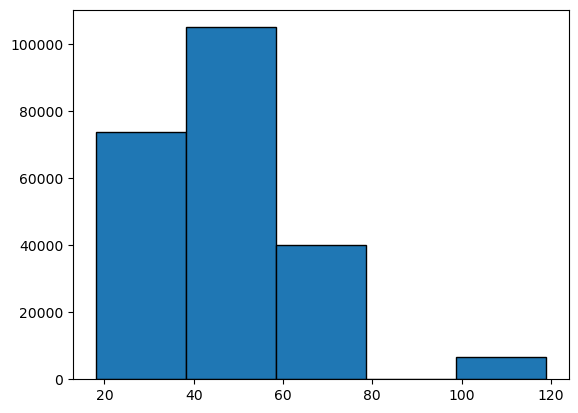

In [10]:
#removing outliers
plt.hist(data['Age'], bins=5, edgecolor='black')

In [11]:
data['Age'].skew()

1.1874585435558822

In [12]:
#removing outliers from age
q1=data['Age'].quantile(0.25)
q3=data['Age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [13]:
#making another copy of data
data1=data.copy()

In [14]:
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

In [15]:
#encoding categorical variables
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['Investor_ID']=l.fit_transform(data['Investor_ID'])
data['Education']=l.fit_transform(data['Education'])
data['Employment_Status']=l.fit_transform(data['Employment_Status'])
data['Owns_Property']=l.fit_transform(data['Owns_Property'])
data['Has_Dependents']=l.fit_transform(data['Has_Dependents'])
data['Investment_Sector']=l.fit_transform(data['Investment_Sector'])
data['Has_Investment_Advisor']=l.fit_transform(data['Has_Investment_Advisor'])

In [16]:
#checking columns with data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218626 entries, 0 to 225346
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Investor_ID                     218626 non-null  int32  
 1   Age                             218626 non-null  float64
 2   Annual_Income                   218626 non-null  float64
 3   Investment_Amount               218626 non-null  float64
 4   Risk_Tolerance_Score            218626 non-null  int64  
 5   Months_of_Investing_Experience  218626 non-null  int64  
 6   Number_of_Active_Investments    218626 non-null  float64
 7   Potential_Return_Rate           218626 non-null  float64
 8   Investment_Duration             218626 non-null  int64  
 9   Investment_to_Income_Ratio      218626 non-null  float64
 10  Education                       218626 non-null  int32  
 11  Employment_Status               218626 non-null  int32  
 12  Marital_Status       

In [17]:
x=data.drop(columns=['Investment_Failed','Marital_Status'], axis=1)
y=data['Investment_Failed']

In [18]:
#imbalance class
data['Investment_Failed'].value_counts()

Investment_Failed
0    199535
1     19091
Name: count, dtype: int64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [21]:
#class balancing using smote
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE()
# Fit SMOTE to your data 
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_resampled,y_resampled)
print('accuracy on training data {:.2f}', rf.score(x_resampled,y_resampled))
print('accuracy on testing data {:.2f}', rf.score(x_test,y_test))

accuracy on training data {:.2f} 0.9999906020337199
accuracy on testing data {:.2f} 0.8928555093079632
